**Importing Libraries**

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


1.   Downloading Dataset
2.   Setting Images size and batch size



In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

**Importing and Preprocessing the dataset**

In [ ]:
train_image_generator = ImageDataGenerator(
    rescale=1/255
)
validation_image_generator = ImageDataGenerator(
        rescale=1/255
    )
test_image_generator = ImageDataGenerator(
    rescale=1/255
)

trin_dir='/content/cats_and_dogs/train'
val_dir='/content/cats_and_dogs/validation'
test_dir='/content/cats_and_dogs/test'


train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode="binary")

val_data_gen = validation_image_generator.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode="binary"
)

test_data_gen = test_image_generator.flow_from_directory(
    '/content/cats_and_dogs',
        classes=['test'],
    target_size=(150, 150),
    batch_size=128,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


**Plotting Datset**

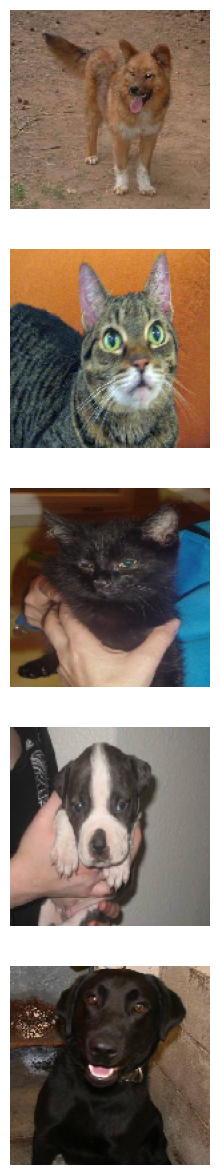

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


**Data Augmentation to avoid overfitting**

In [ ]:
# 5

train_image_generator =  ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest"
)


**Calling the augemntation function and adding the augemneted images to the real training dataset**

Found 2000 images belonging to 2 classes.


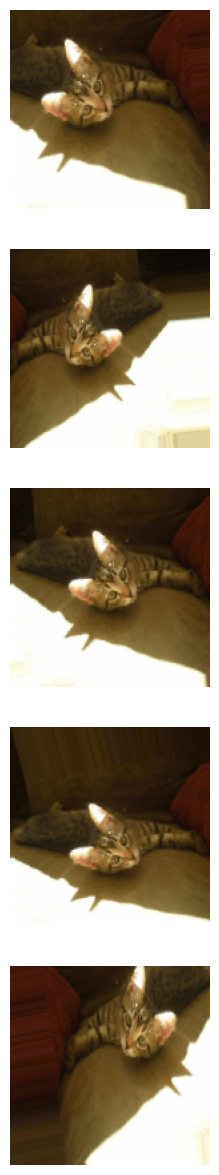

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

**Model**

In [ ]:
# 7
model = Sequential()

model.add(Conv2D(32, 3, input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation = 'sigmoid'))

# model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='SparseCategoricalCrossentropy',
            optimizer='adam',
            metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

**Training and early stopping of model**

In [ ]:
# 8
from keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
history=model.fit( train_data_gen,epochs=10,validation_data=val_data_gen, callbacks=[early_stopping])

model.save('keras_model2.h5')
 #   validation_steps=len(validation_generator.filenames) // BATCH_SIZE

model = tf.keras.models.load_model('keras_model2.h5')

Epoch 1/10
16/16 [==============================] - 23s 1s/step - loss: 0.7017 - accuracy: 0.5110 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 20s 1s/step - loss: 0.6926 - accuracy: 0.5150 - val_loss: 0.6836 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 18s 1s/step - loss: 0.6840 - accuracy: 0.5365 - val_loss: 0.6652 - val_accuracy: 0.6010
Epoch 4/10
16/16 [==============================] - 19s 1s/step - loss: 0.6712 - accuracy: 0.5835 - val_loss: 0.6790 - val_accuracy: 0.5500
Epoch 5/10
16/16 [==============================] - 18s 1s/step - loss: 0.6705 - accuracy: 0.5710 - val_loss: 0.6716 - val_accuracy: 0.5600
Epoch 6/10
16/16 [==============================] - 19s 1s/step - loss: 0.6727 - accuracy: 0.5635 - val_loss: 0.6362 - val_accuracy: 0.6150
Epoch 7/10
16/16 [==============================] - 18s 1s/step - loss: 0.6600 - accuracy: 0.5885 - val_loss: 0.6530 - val_accuracy: 0.6000
Epoch 8/10
16/16 [==

**Plotting Results**

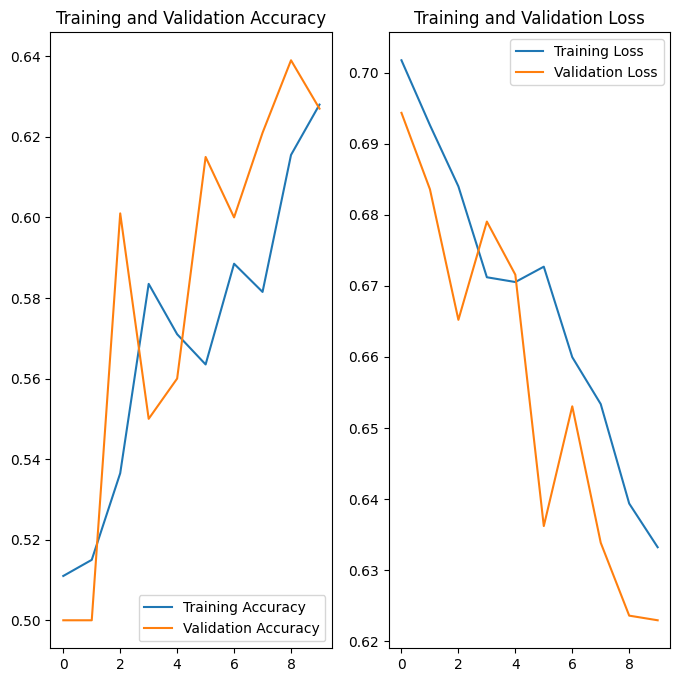

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict(test_data_gen)
probabilities = [1 if a[0]<a[1] else 0 for a in predictions]

1/1 [==============================] - 1s 677ms/step


In [ ]:
print(len(probabilities))


50


**Testing our model**

In [ ]:
# 11
import numpy as numpy
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
